# ***Bag of Words Project***

> This project demostrates how we can use data and convert it to vectors to train the model using 'Natural Language Processing' and a technique called 'Bag of Words'.



In [144]:
# Importing Libraries
import pandas as pd
import numpy as np

## Spam Email Analysis

Link for the Spam and Ham dataset = [link text](https://www.kaggle.com/datasets/meruvulikith/190k-spam-ham-email-dataset-for-classification)

In [145]:
data = pd.read_csv("spam.csv") # Reading the data
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [146]:
# Printing the unique values for the Category column
data.Category.value_counts()

,count
Category,
ham,4825
spam,747


In [147]:
# Creating a new column 'spam' and performing label encoding
data['spam'] = data['Category'].apply(lambda x : 1 if x == 'spam' else 0)
data

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [148]:
data.shape # Generating the shape of the dataset to understand the  dimensions

(5572, 3)

In [149]:
data.head() # Printing the first 5 rows from the dataset

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [150]:
# Splitting the data into Train Test Splits

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.Message, data.spam, test_size = 0.2)

In [151]:
X_train.shape # Print the the number of rows or total data in the training split

(4457,)

In [152]:
X_test.shape # Testing split

(1115,)

In [153]:
X_train[:4] # Printing the first 4 rows of the training set to see how the training data is

,Message
3704,How is my boy? No sweet words left for me this...
2228,Oh k.k..where did you take test?
3168,"When people see my msgs, They think Iam addict..."
1938,The fact that you're cleaning shows you know w...


In [154]:
from sklearn.feature_extraction.text import CountVectorizer

In [155]:
# Using CountVectorizer() to convert the text data into vectors
vectorizer = CountVectorizer()

X_train_cv = vectorizer.fit_transform(X_train.values) # Fitting the transformed data to train the model

X_train_cv

<4457x7778 sparse matrix of type '<class 'numpy.int64'>'
	with 59430 stored elements in Compressed Sparse Row format>

In [156]:
X_train_cv.toarray() # Converting the vector to array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [157]:
# Displaying the words from the vocabulary
vectorizer.get_feature_names_out()[1000:2000]

array(['anythin', 'anything', 'anythingtomorrow', 'anytime', 'anyway',
       'anyways', 'anywhere', 'apart', 'apartment', 'apes', 'apeshit',
       'apnt', 'apo', 'apologetic', 'apologise', 'apologize', 'apology',
       'app', 'apparently', 'appeal', 'appear', 'applausestore',
       'applebees', 'apples', 'application', 'apply', 'applying',
       'appointment', 'appointments', 'appreciate', 'appreciated',
       'approaches', 'appropriate', 'approve', 'approved', 'approx',
       'apps', 'appt', 'appy', 'april', 'aproach', 'apt', 'aptitude',
       'aquarius', 'ar', 'arab', 'arabian', 'arcade', 'archive', 'ard',
       'are', 'area', 'aren', 'arent', 'arestaurant', 'aretaking',
       'areyouunique', 'argentina', 'argh', 'argue', 'arguing',
       'argument', 'arguments', 'aries', 'arise', 'arises', 'arm',
       'armand', 'arms', 'arng', 'arngd', 'arnt', 'around', 'aroundn',
       'arr', 'arrange', 'arranging', 'arrested', 'arrival', 'arrive',
       'arrived', 'arrow', 'arsenal'

In [158]:
vectorizer.vocabulary_ # Displaying the whole vocabulary

{'how': 3546,
 'is': 3776,
 'my': 4693,
 'boy': 1484,
 'no': 4826,
 'sweet': 6692,
 'words': 7620,
 'left': 4097,
 'for': 2963,
 'me': 4439,
 'this': 6888,
 'morning': 4616,
 'sighs': 6177,
 'goes': 3197,
 'you': 7738,
 'day': 2208,
 'love': 4257,
 'did': 2332,
 'start': 6484,
 'your': 7744,
 'studying': 6579,
 'oh': 4942,
 'where': 7516,
 'take': 6728,
 'test': 6817,
 'when': 7512,
 'people': 5172,
 'see': 6007,
 'msgs': 4649,
 'they': 6874,
 'think': 6880,
 'iam': 3599,
 'addicted': 812,
 'to': 6969,
 'msging': 4646,
 'are': 1050,
 'wrong': 7656,
 'bcoz': 1275,
 'don': 2433,
 'know': 3988,
 'that': 6847,
 'friends': 3029,
 'bslvyl': 1551,
 'the': 6851,
 'fact': 2775,
 're': 5614,
 'cleaning': 1856,
 'shows': 6157,
 'why': 7534,
 'upset': 7235,
 'priority': 5446,
 'constantly': 2004,
 'what': 7507,
 'want': 7412,
 'do': 2406,
 'not': 4862,
 'need': 4757,
 'helloooo': 3420,
 'wake': 7395,
 'up': 7220,
 'welcomes': 7487,
 'enjoy': 2627,
 'with': 7579,
 'full': 3063,
 'of': 4924,
 'joy':

In [159]:
X_train_cv.shape

(4457, 7778)

In [160]:
# Converting the vectors to array and storing it in a new variable
X_train_np = X_train_cv.toarray()

X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0])

In [161]:
np.where(X_train_np[0]!=0) # Print the non-zero values from the array

(array([1484, 2208, 2332, 2963, 3197, 3546, 3776, 4097, 4257, 4439, 4616,
        4693, 4826, 6177, 6484, 6579, 6692, 6888, 7620, 7738, 7744]),)

In [164]:
X_train[:4][3704] # Retrieveing the '3704' mail from the training set

'How is my boy? No sweet words left for me this morning ... *sighs* ... How goes you day, my love ? Did you start your studying?'

In [193]:
X_train_np[0][1484] # Retrieveing the value of '1484' index of the first row from the training set

1

In [166]:
vectorizer.get_feature_names_out()[2259] # Retrieveing the '2259' word from the training set

'delay'

In [167]:
# Importing the MultinomialNB model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB() # Initializing the model

model.fit(X_train_cv, y_train) # Training the model

MultinomialNB()

In [168]:
X_test_cv = vectorizer.transform(X_test) # Transforming the test data to vectors

In [169]:
# Importing classification report to evaluate the model's performance
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv) # Predicting using trained model on testing data

# Printing the clasification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.99      0.91      0.95       150

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [170]:
# Checking if the model works on new set of Emails

emails = [
    'Hey Sarthak, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

email_count = vectorizer.transform(emails) # Transforming the mails to vector

model.predict(email_count) # Predicting the sentiments of the email

array([0, 1])

In [171]:
# Defining the mapping of the prediction output to text labels
label_map = {0: 'ham', 1: 'spam'}

for email, prediction in zip(emails, model.predict(email_count)):
    print(f"Email: {email}\nPrediction: {label_map[prediction]}\n")


Email: Hey Sarthak, can we get together to watch footbal game tomorrow?
Prediction: ham

Email: Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!
Prediction: spam



Another way of achieveing the same output by streamlining the process by using **Pipeline**

In [172]:
from sklearn.pipeline import Pipeline

In [173]:
# Defining the workflow for converting the data and what model to be used
clf = Pipeline([('vectorizer' , CountVectorizer()) , ('nb', MultinomialNB())])

clf.fit(X_train, y_train) # Training the model

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [174]:
y_pred = clf.predict(X_test) # Predicting using the trained model and test data

print(classification_report(y_test, y_pred)) # Printing the classification report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.99      0.91      0.95       150

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



## Movie Review Sentiment Analysis

Link for the dataset = [link text](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download)

In [175]:
# Importing the required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [176]:
df = pd.read_csv('IMDB Dataset.csv') # Reading the data
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [177]:
df.shape # Displaying the shape of the data

(50000, 2)

In [178]:
# Printing the first 5 rows of the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [179]:
# Print the 3rd row in the dataset
print(df.iloc[3])

review       Basically there's a family where a little boy ...
sentiment                                             negative
Name: 3, dtype: object


In [180]:
# Creating a new column and performing label encoding
df["Category"] = df['sentiment'].apply(lambda x : 1 if x == 'positive' else 0)
df

,review,sentiment,Category
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [181]:
print(df['Category'].value_counts()) # Getting the dimensions of the target column

Category
1    25000
0    25000
Name: count, dtype: int64


In [182]:
# SPlitting the dataset into train test splits
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['Category'], test_size= 0.2)

In [183]:
# Creating a pipline for RandomForestClassifier model

movie_clf_rf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=50 , criterion='entropy'))])

movie_clf_rf.fit(X_train, y_train) # Training the model

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

In [184]:
y_pred_rf = movie_clf_rf.predict(X_test) # Predicting using the trained model

In [185]:
# Getting the Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5077
           1       0.84      0.83      0.84      4923

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [186]:
# Creating a pipline for KNeighborsClassifier model

movie_clf_knn = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors= 10, metric='euclidean'))])

movie_clf_knn.fit(X_train, y_train)  # Training the model

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [187]:
y_pred_knn = movie_clf_knn.predict(X_test) # Predicting using the trained model

print(classification_report(y_test, y_pred_knn)) # Getting the Classification Report

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      5077
           1       0.65      0.65      0.65      4923

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



In [188]:
# Creating a pipline for MultinomialNB model

movie_clf_mnb = Pipeline([
    ('vectorizer' , CountVectorizer()),
    ('mnb', MultinomialNB())
])

movie_clf_mnb.fit(X_train, y_train)  # Training the model

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [189]:
y_pred_mnb = movie_clf_mnb.predict(X_test)# Predicting using the trained model

# Getting the Classification Report
print(classification_report(y_test , y_pred_mnb))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      5077
           1       0.87      0.82      0.84      4923

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



<ipython-input-190-3bd692b5e862>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


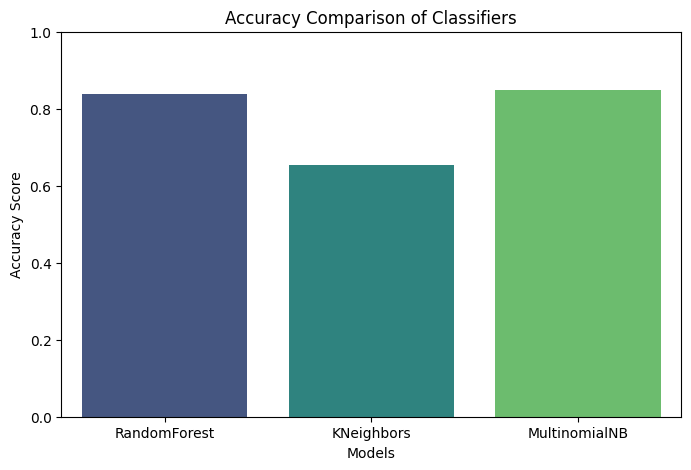

In [190]:
# Visualizing the outputs using a Bar Chart

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


models = {
    "RandomForest": movie_clf_rf,
    "KNeighbors": movie_clf_knn,
    "MultinomialNB": movie_clf_mnb
}

accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}


plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparison of Classifiers")
plt.ylim(0, 1)
plt.show()


<Figure size 500x400 with 0 Axes>

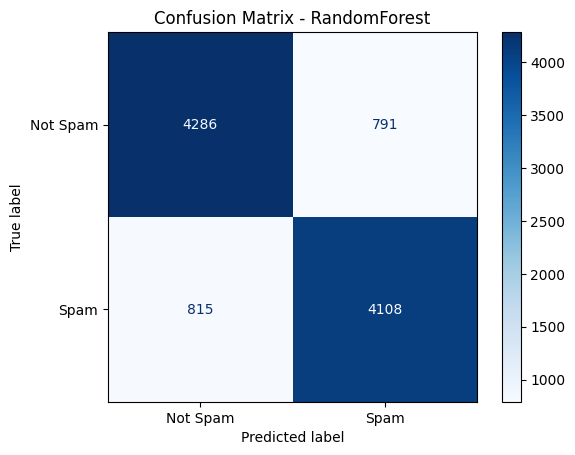

<Figure size 500x400 with 0 Axes>

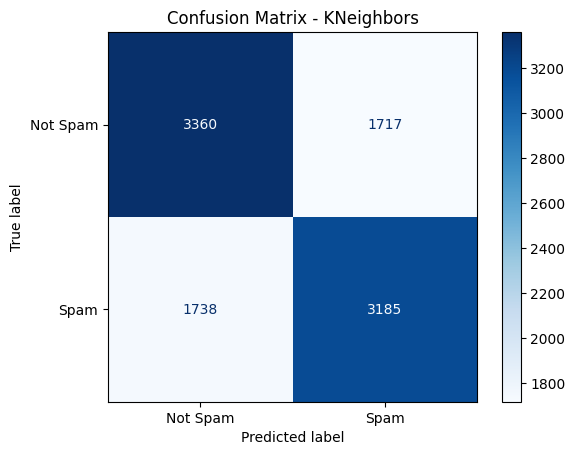

<Figure size 500x400 with 0 Axes>

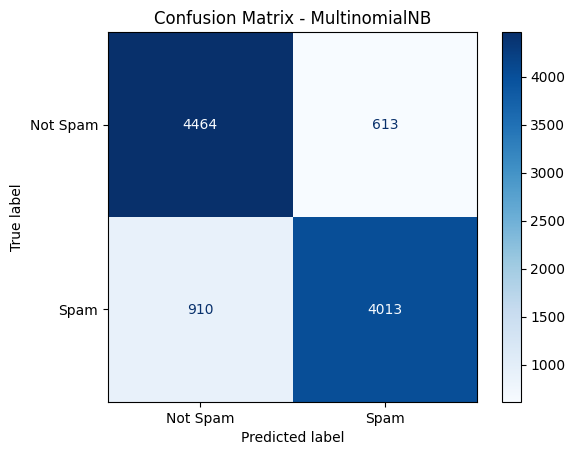

In [191]:
# Visualizing the outputs using a Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


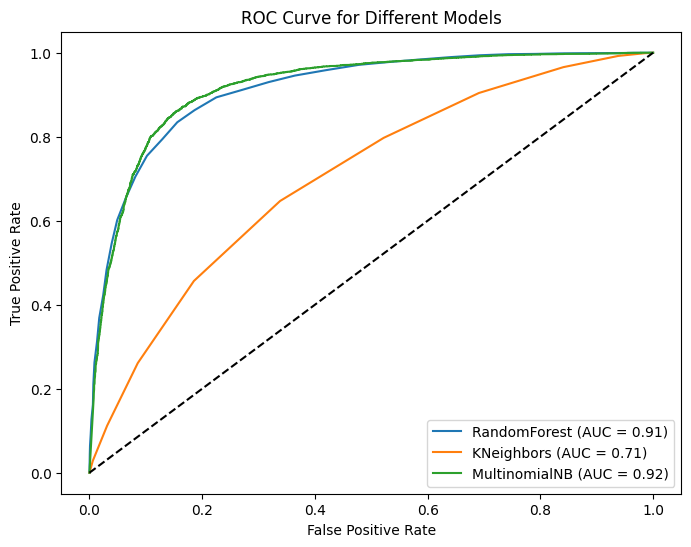

In [192]:
# Visualizing the outputs using a Roc Curve

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Different Models")
plt.legend()
plt.show()
